In [1]:
from myutils import *
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc") # 从上面随便选一个


%matplotlib inline
# plt.rcParams['font.sans-serif'] = [u'SimHei']
# plt.rcParams['axes.unicode_minus'] = False
middle_dict={"七","八","九"}
all_zhuanti=listZhuanTi()
all_zhishidian=listZsd()
chuzhong_zhuanti=[]
chuzhong_zsd=[]

for zhuantiId in all_zhuanti:
    gradeName=findGrade(zhuantiId)[0]
    if gradeName in middle_dict:
        chuzhong_zhuanti.append(zhuantiId)
for zsdId in all_zhishidian:
    gradeName=findGrade(zsdId)[0]
    if gradeName in middle_dict:
        chuzhong_zsd.append(zsdId)
        
print('专题数',len(chuzhong_zhuanti))
print('知识点数',len(chuzhong_zsd))

def createImage(node,edges,node_labels):
    import networkx as nx
    G = nx.Graph()
    G.add_nodes_from([node_labels[x] for x in nodeA])
    for (a,b) in edges:
        G.add_edge(node_labels[a],node_labels[b])
    S=[G.subgraph(c).copy() for c in nx.connected_components(G)]
    for i,Si in enumerate(S):
        pos=nx.spring_layout(Si)
        # pos=nx.circular_layout(G)
        # _=nx.draw_networkx_labels(G, pos, font_size=10, font_family ='song')
        plt.figure(figsize=(10,10))
        nx.draw(Si,pos=pos,node_size=10,with_labels=True,font_family ='song',font_size=15)
        plt.savefig('%d.png'%i)

专题数 21
知识点数 258


In [ ]:
def demo1(zhuantiIds):
    
    for zhuanti in zhuantiIds:
        dim1,dim2=0,1
        _,Q=getQuestionInZhuanTi(zhuanti)
        Q=np.array([Q[:,dim1],Q[:,dim2]]).T
        u,sigma,v1,v2=analysis(Q)
        plt.figure(figsize=(10,10))
        ax=plt.subplot(111)
        ax.set_aspect('equal')

        drawArrow(u,2*np.max(sigma)*v1*np.sign(v1[0]),ax,color='r',size=0.1*np.max(sigma))
        drawArrow(u,2*np.max(sigma)*v2*np.sign(v2[1]),ax,color='b',size=0.1*np.max(sigma))
        plt.scatter(u[0],u[1],marker='+',s=500,c='r')
        plt.scatter(Q[:,0],Q[:,1])
        plt.title(getZhuanTiNameById(zhuanti),fontproperties=font)
        plt.xlabel('dim 1')
        plt.ylabel('dim 2')

In [ ]:
demo1(chuzhong_zhuanti)

In [ ]:
def demo2(zhuanti='29d070d003e811eb9aaebd621c7eea23'):
    #演示 随即投影轴的选取
    dim1,dim2=0,1
    _,Q=getQuestionInZhuanTi(zhuanti)
    Q=np.array([Q[:,dim1],Q[:,dim2]]).T
    u,sigma,v1,v2=analysis(Q)
    za,zdir,zsigma=randomSigma(sigma)
      
    plt.figure(figsize=(10,10))
    ax=plt.subplot(111)
    ax.set_aspect('equal')

    
    drawArrow(u,2*np.max(sigma)*v1*np.sign(v1[0]),ax,color='r',size=0.1*np.max(sigma))
    drawArrow(u,2*np.max(sigma)*v2*np.sign(v2[1]),ax,color='b',size=0.1*np.max(sigma))
    drawArrow(u,2*np.max(sigma)*zdir,ax,color='g',size=0.1*np.max(sigma))
    drawArrow(u,2*np.max(sigma)*za,ax,color='black',size=0.1*np.max(sigma))
    
    plt.scatter(u[0],u[1],marker='+',s=500,c='r')
    plt.scatter(Q[:,0],Q[:,1])
    plt.title(zhuanti)
    plt.xlabel('dim 1')
    plt.xlabel('dim 2')

In [ ]:
for i in range(3):
    demo2()

In [ ]:
def demo3(zhuanti='29d070d003e811eb9aaebd621c7eea23',userattr=np.array([0.38,0.33]),s=1,t=0,n=3,seed=22):
    #演示 用户选题匹配的过程,target+
    #s表示范围，s越大，选题范围越大,t表示偏移，t越大，选题越简单
    #n表示选择的题目数量
    
    np.random.seed(seed)
    dim1,dim2=0,1
    _,Q=getQuestionInZhuanTi(zhuanti)
    Q=np.array([Q[:,dim1],Q[:,dim2]]).T
    u,sigma,v1,v2=analysis(Q)
    za,zdir,zsigma=randomSigma(sigma)
      
    plt.figure(figsize=(10,10))
    ax=plt.subplot(111)
    ax.set_aspect('equal')

    #主轴，侧轴,随即投影轴
    drawArrow(u,2*np.max(sigma)*v1*np.sign(v1[0]),ax,color='r',size=0.1*np.max(sigma))
    drawArrow(u,2*np.max(sigma)*v2*np.sign(v2[1]),ax,color='b',size=0.1*np.max(sigma))
    drawArrow(u,2*np.max(sigma)*zdir,ax,color='g',size=0.1*np.max(sigma))

    #数据点（包括中心），用户点，
    plt.scatter(u[0],u[1],marker='+',s=500,c='r')
    plt.scatter(userattr[0],userattr[1],marker='o',s=200,c='g')
    plt.scatter(Q[:,0],Q[:,1])
    
    
    for _ in range(n):
        #选择
        Qchioce=distance_choose(userattr,Q,zdir,zsigma,s=s,t=t)
        plt.scatter(Qchioce[0],Qchioce[1],marker='x',s=200,c='black')
          
    plt.title(getZhuanTiNameById(zhuanti),fontproperties=font)
    plt.xlabel('dim 1')
    plt.xlabel('dim 2')

In [ ]:
demo3(n=20,s=1,t=0)
demo3(n=20,s=0.2,t=0)
demo3(n=20,s=0.2,t=0.05)
demo3(n=20,s=0.2,t=0.2)

In [ ]:
def demo4(zhuanti='29d070d003e811eb9aaebd621c7eea23',userattr=np.array([0.38,0.33]),s=1,t=0,n=3,seed=22):
    #演示 用户选题匹配的过程
    #s表示范围，s越大，选题范围越大,t表示偏移，t越大，选题越简单
    #n表示选择的题目数量
    
    np.random.seed(seed)
    dim1,dim2=0,1
    _,Q=getQuestionInZhuanTi(zhuanti)
    Q=np.array([Q[:,dim1],Q[:,dim2]]).T
    u,sigma,v1,v2=analysis(Q)
    za,zdir,zsigma=randomSigma(sigma)
      
    plt.figure(figsize=(10,10))
    ax=plt.subplot(111)
    ax.set_aspect('equal')

    #主轴，侧轴,随即投影轴
    drawArrow(u,2*np.max(sigma)*v1*np.sign(v1[0]),ax,color='r',size=0.1*np.max(sigma))
    drawArrow(u,2*np.max(sigma)*v2*np.sign(v2[1]),ax,color='b',size=0.1*np.max(sigma))
    drawArrow(u,2*np.max(sigma)*zdir,ax,color='g',size=0.1*np.max(sigma))

    #数据点（包括中心），用户点，
    plt.scatter(u[0],u[1],marker='+',s=500,c='r')
    plt.scatter(userattr[0],userattr[1],marker='o',s=200,c='g')
    plt.scatter(Q[:,0],Q[:,1])
    
    
    for _ in range(n):
        #选择
        Qchioce=distance_choose_minus(userattr,Q,zdir,zsigma,s=s,t=t)
        plt.scatter(Qchioce[0],Qchioce[1],marker='x',s=200,c='black')
          
    plt.title(getZhuanTiNameById(zhuanti),fontproperties=font)
    plt.xlabel('dim 1')
    plt.xlabel('dim 2')

In [ ]:
demo4(n=20,s=1,t=0)
demo4(n=20,s=0.2,t=0)
demo4(n=20,s=0.2,t=0.05)
demo4(n=20,s=0.2,t=0.2)

In [8]:
def demo5(zhuantiIds):
    
    for zhuanti in zhuantiIds:
        _,Q=getQuestionInZhuanTi(zhuanti)
        u,sigma,v1,v2=analysis(Q)
        v1=v1*np.sign(v1[0])
        plt.figure(figsize=(10,10))
        ax=plt.subplot(111)
#         ax.set_aspect('equal')

        _=plt.hist(Q.dot(v1),density=True)
        plt.title(getZhuanTiNameById(zhuanti)+'sigma:'+str(np.sqrt(v1.dot(sigma).dot(v1))),fontproperties=font)

/home/mathai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  import sys


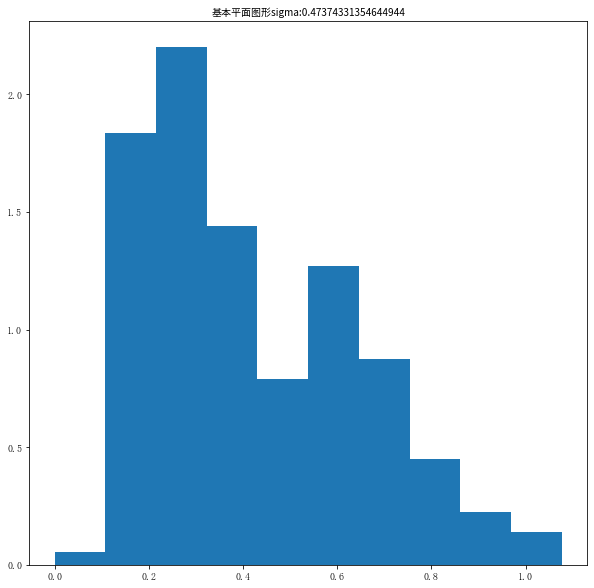

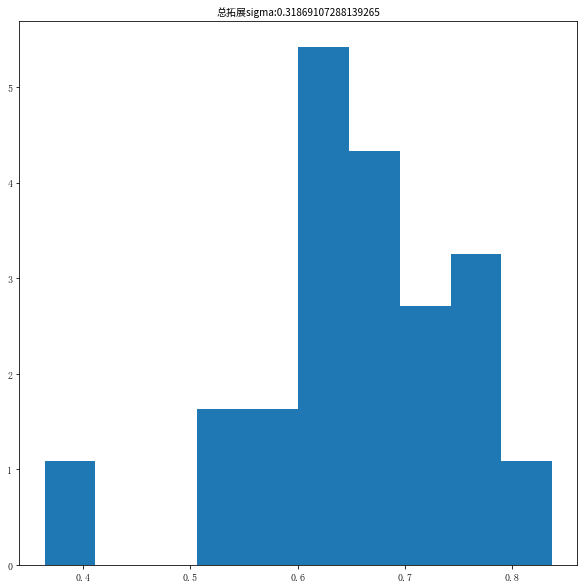

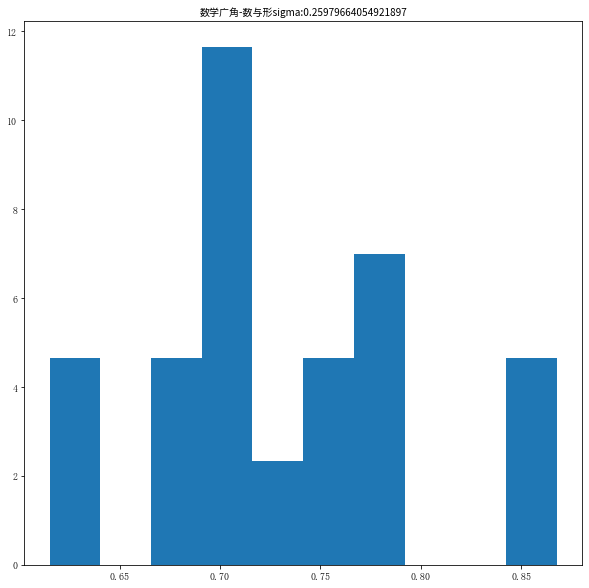

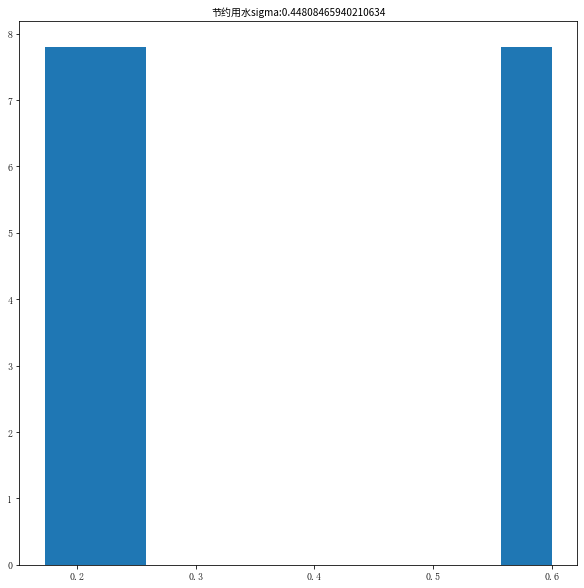

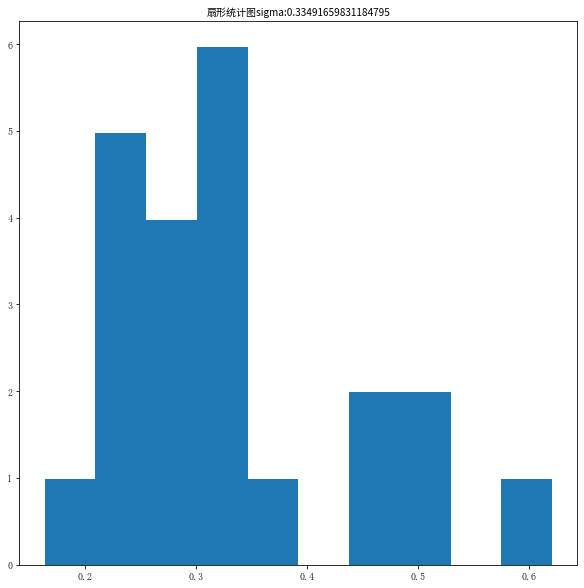

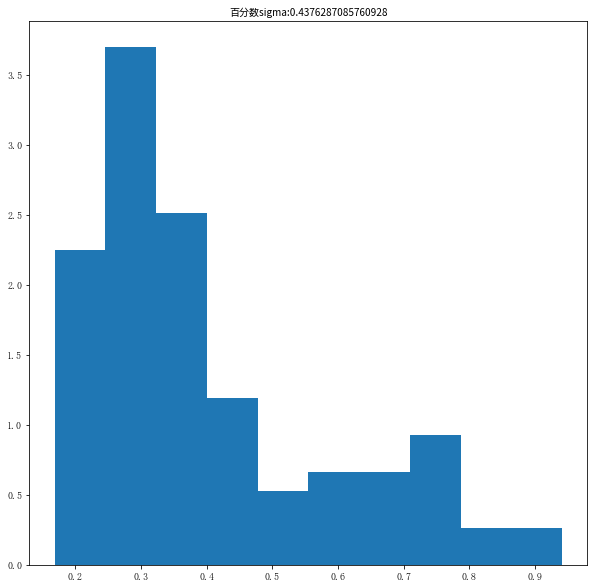

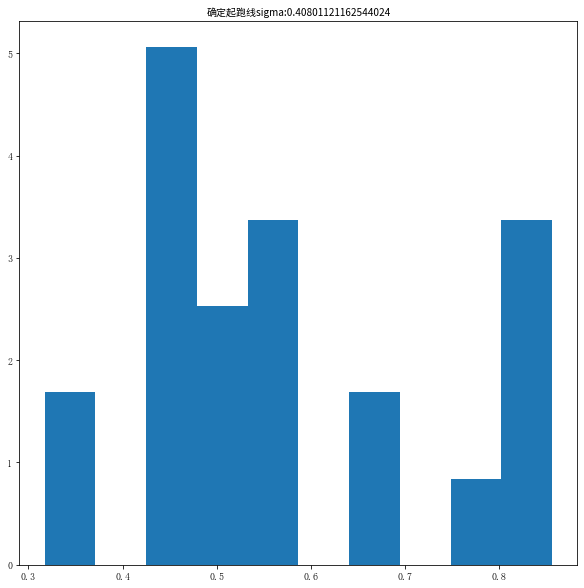

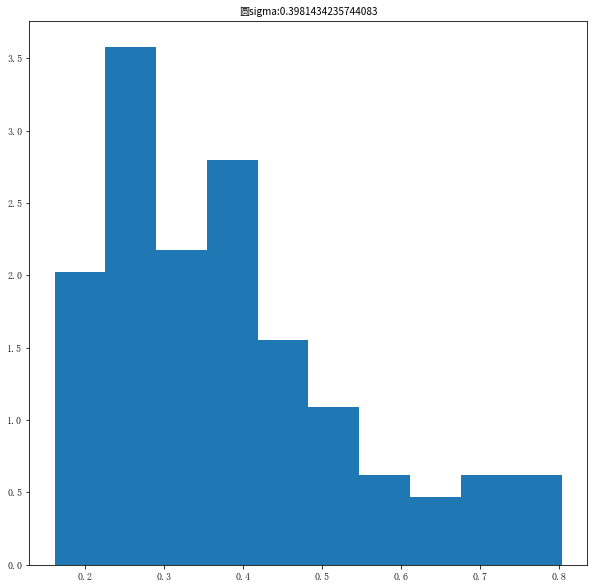

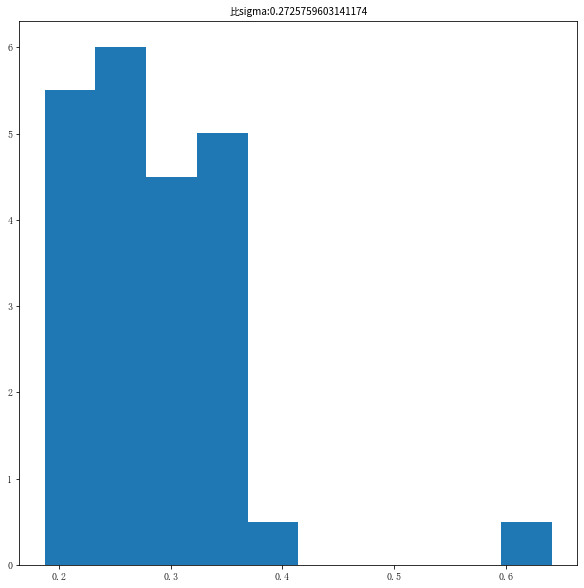

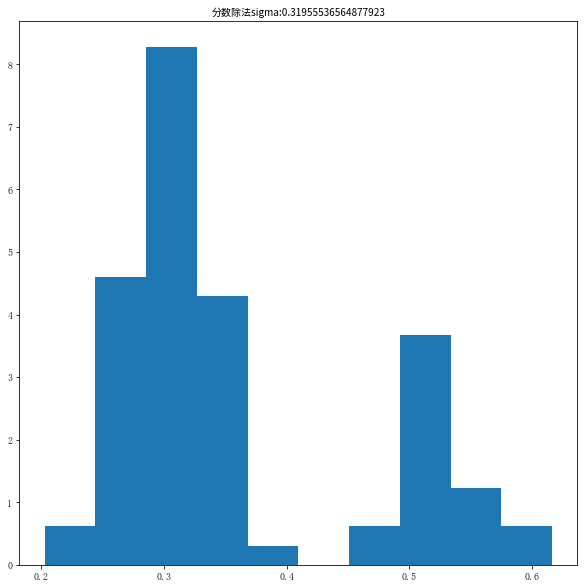

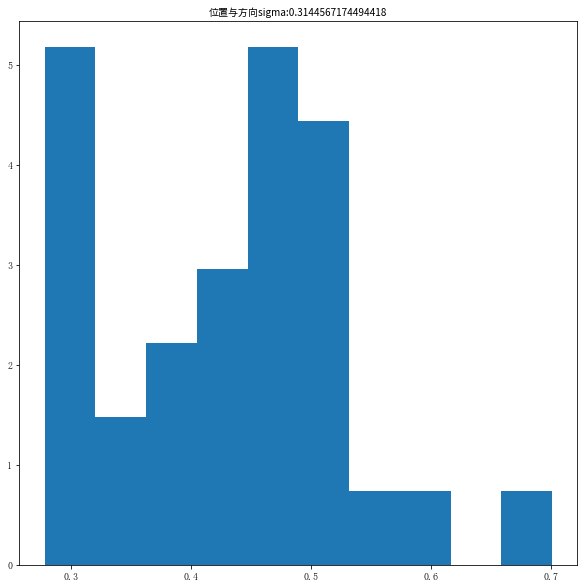

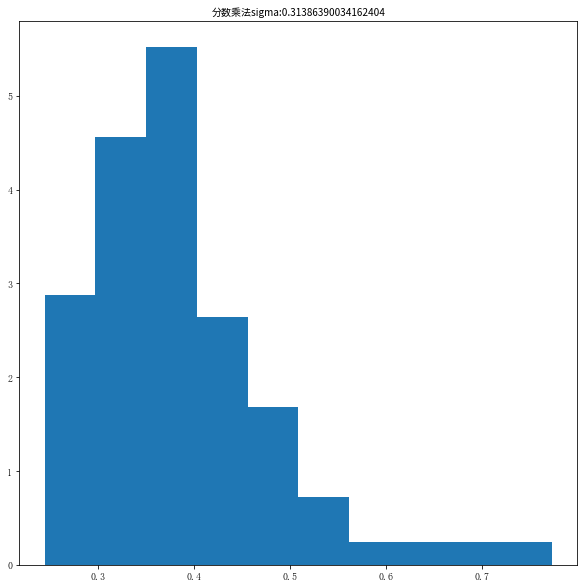

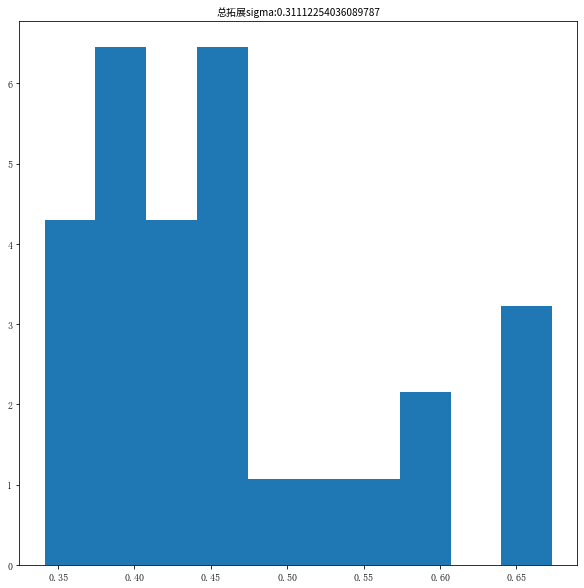

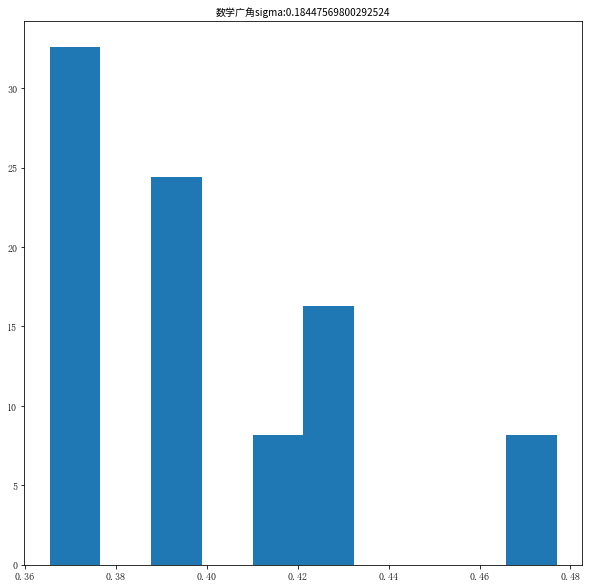

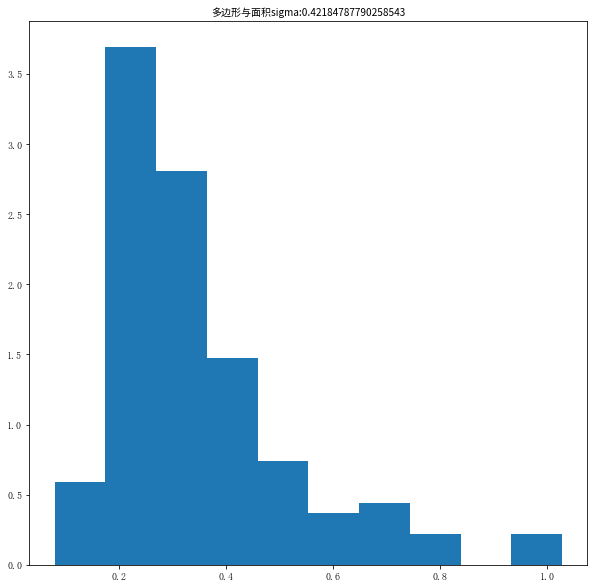

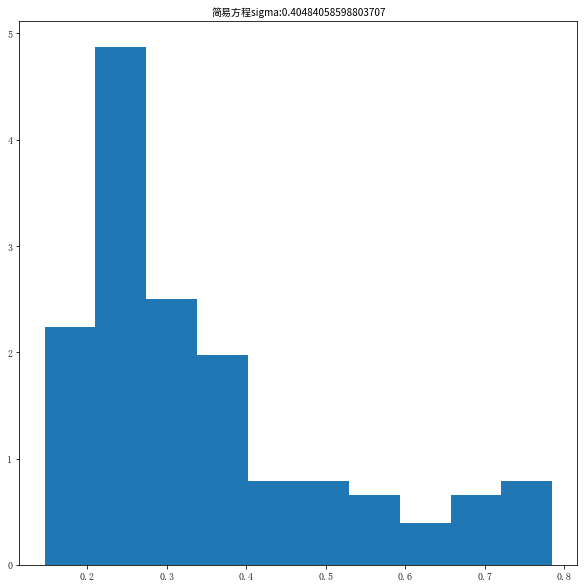

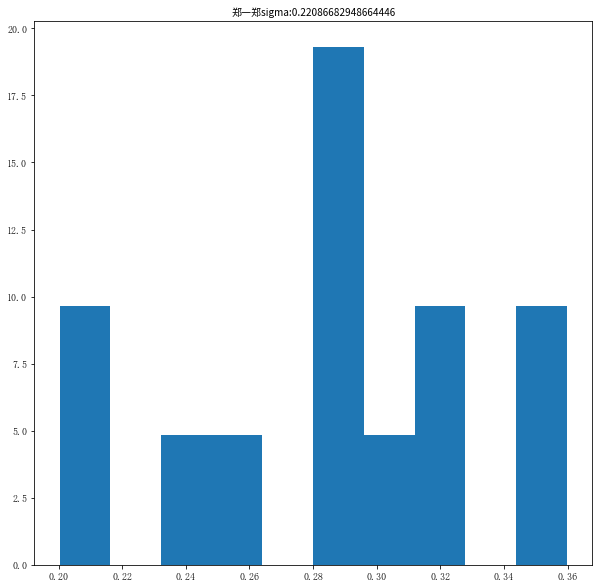

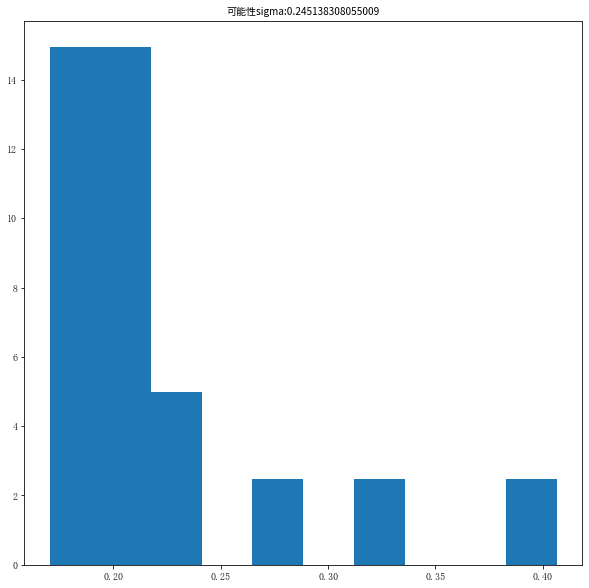

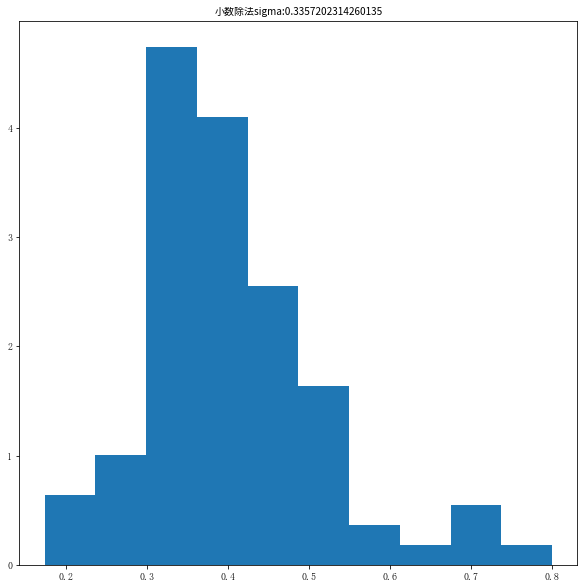

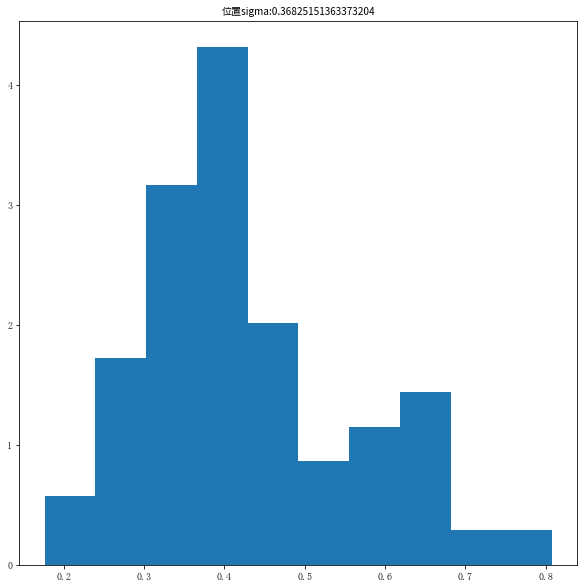

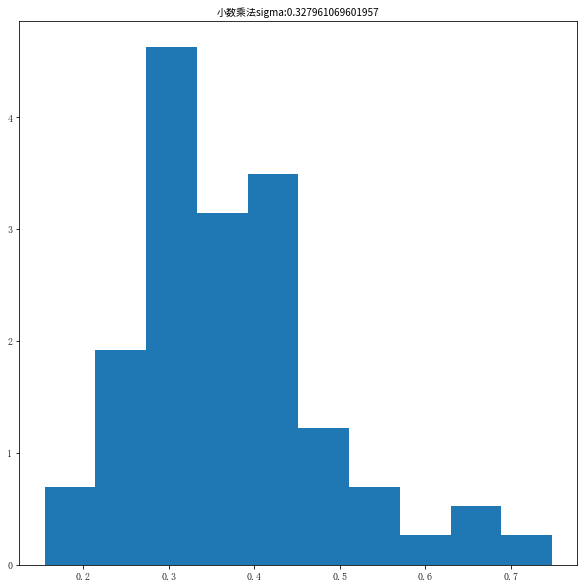

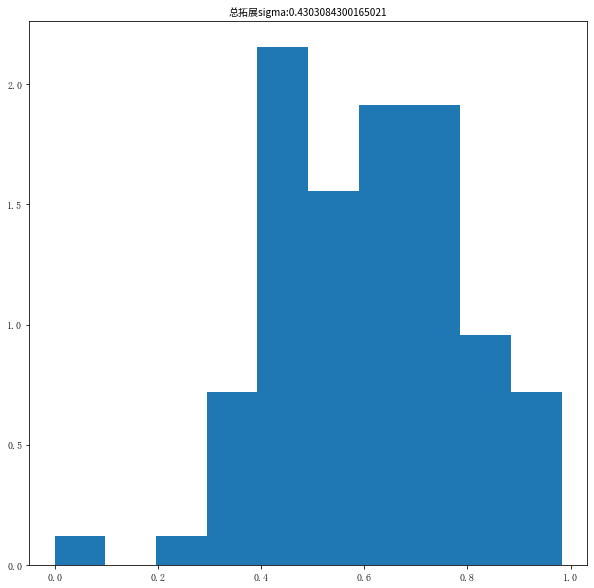

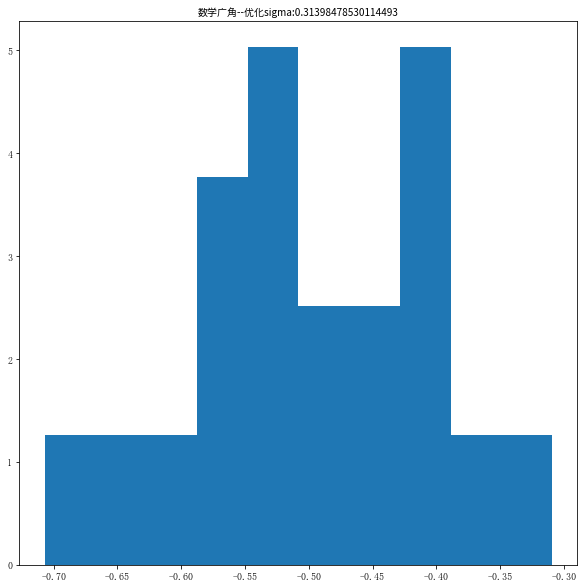

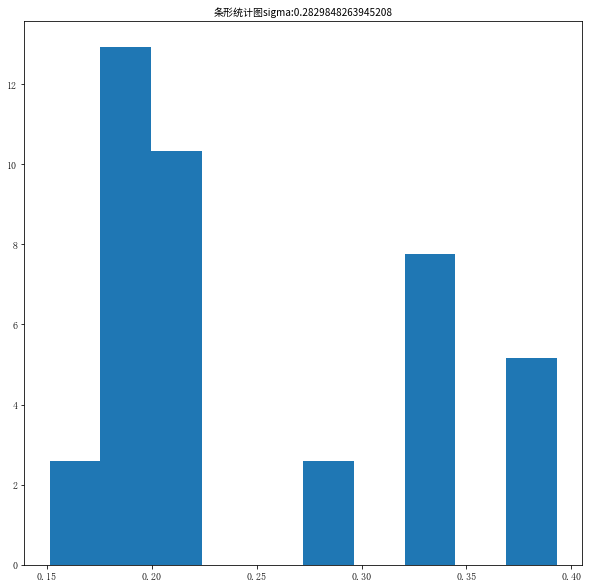

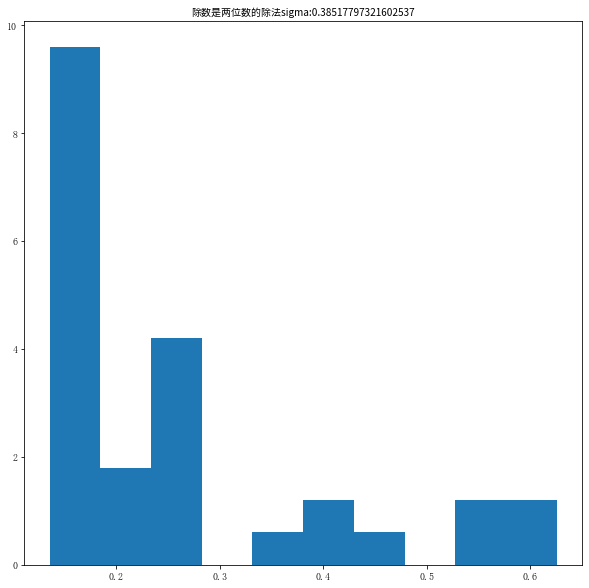

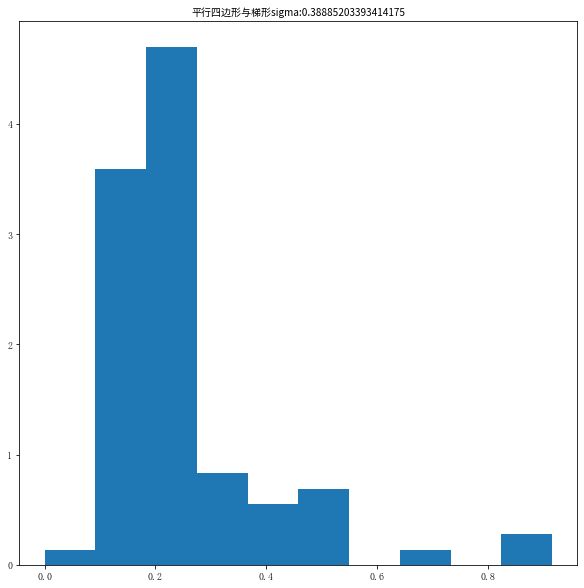

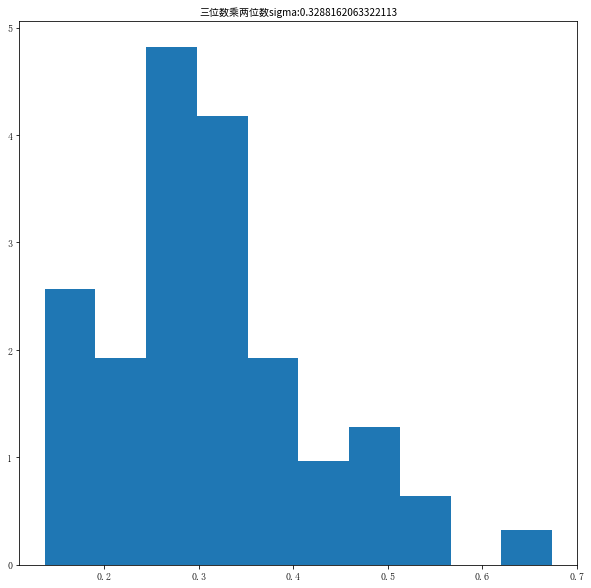

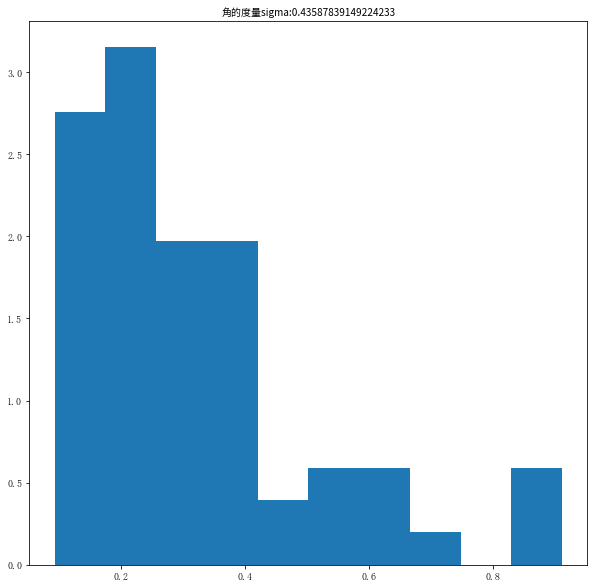

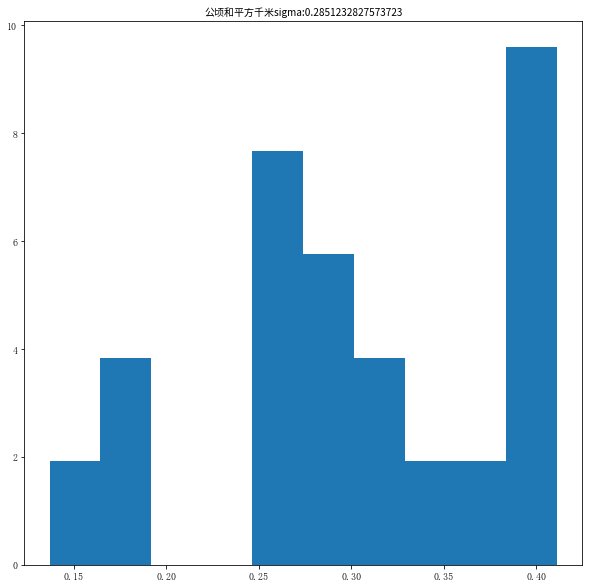

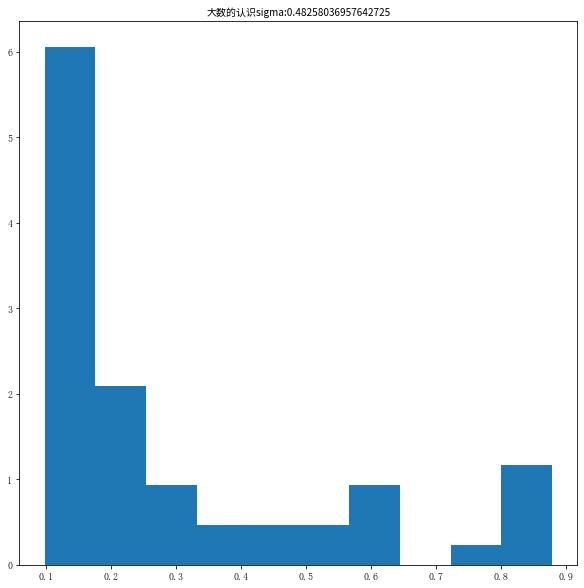

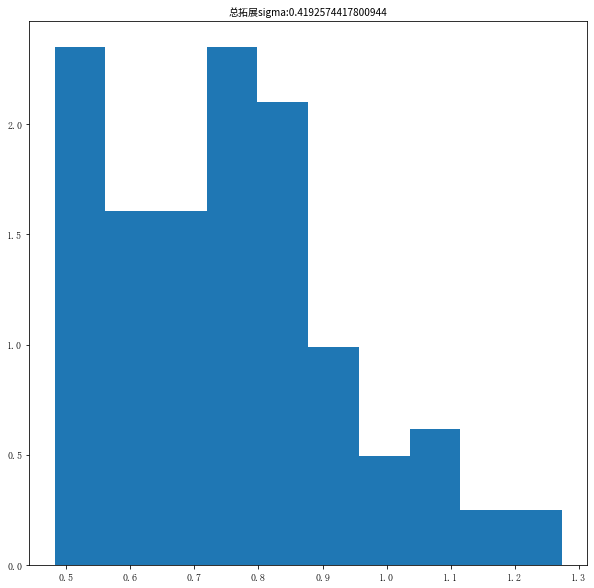

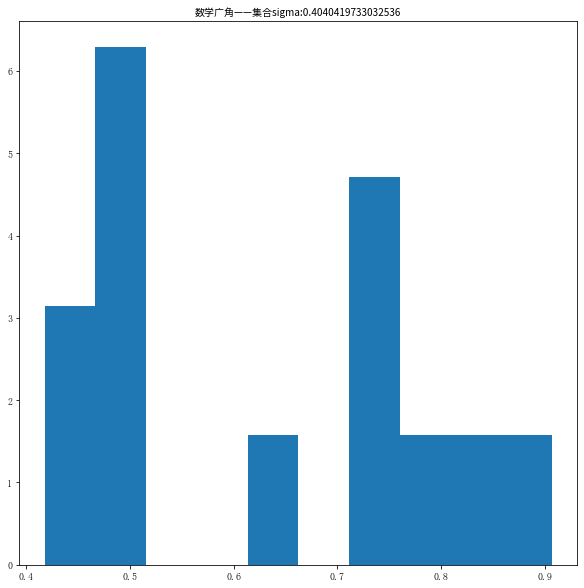

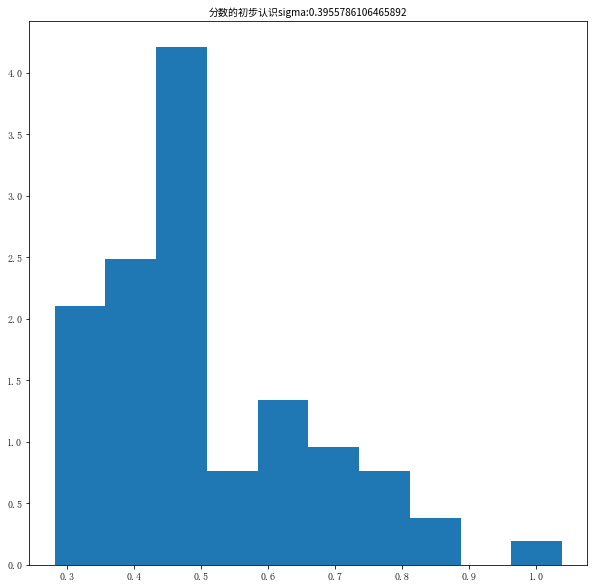

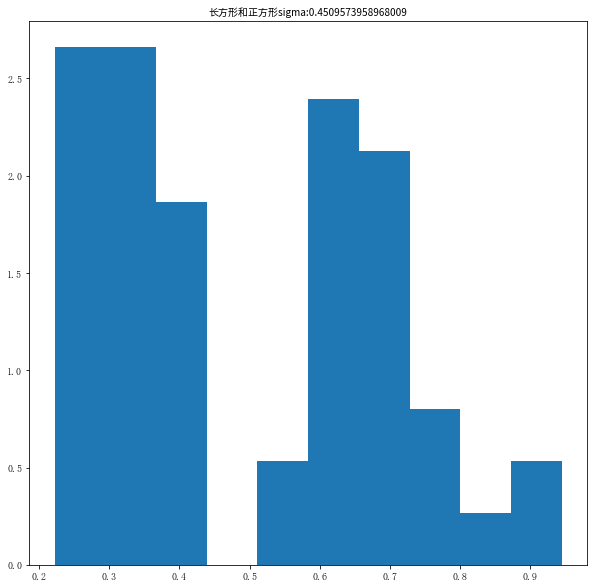

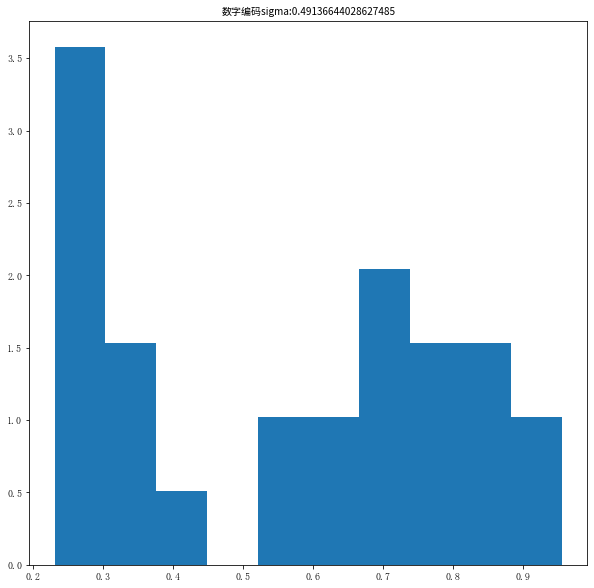

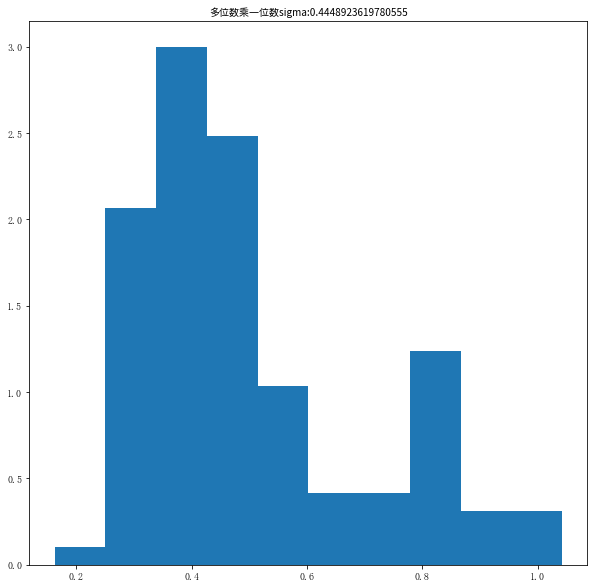

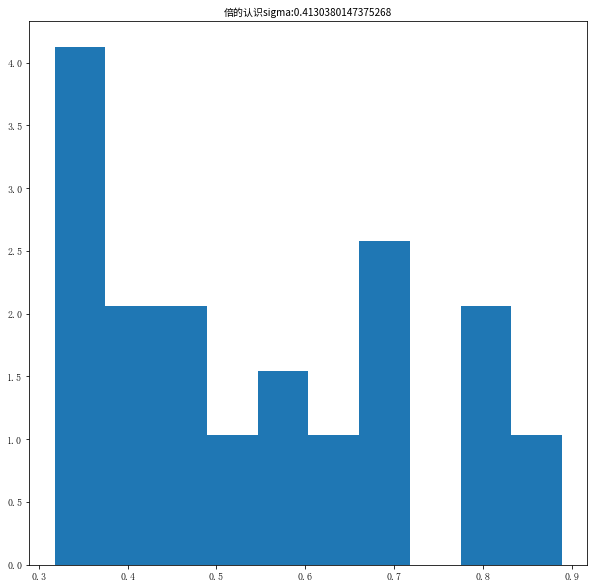

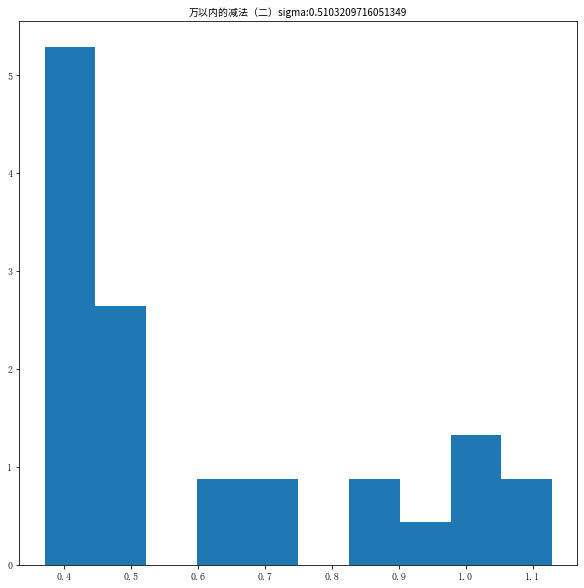

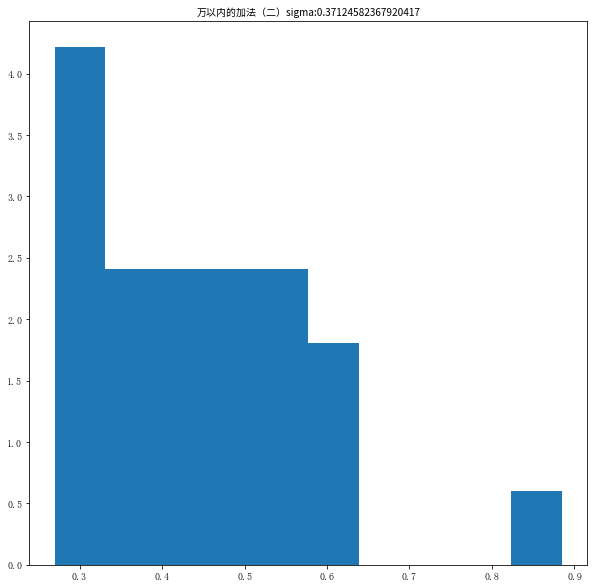

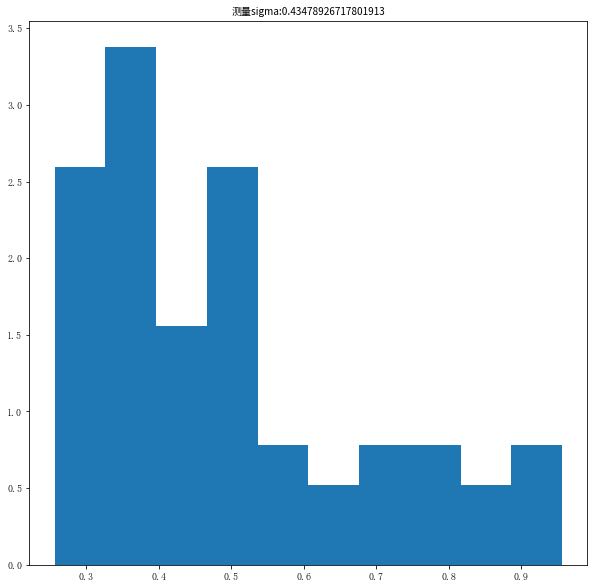

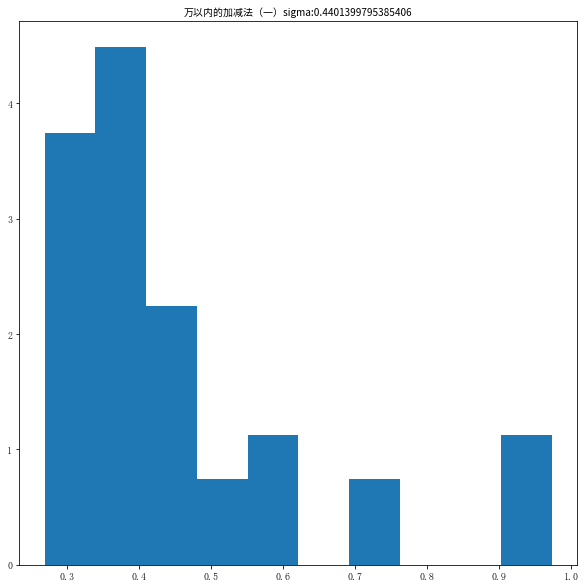

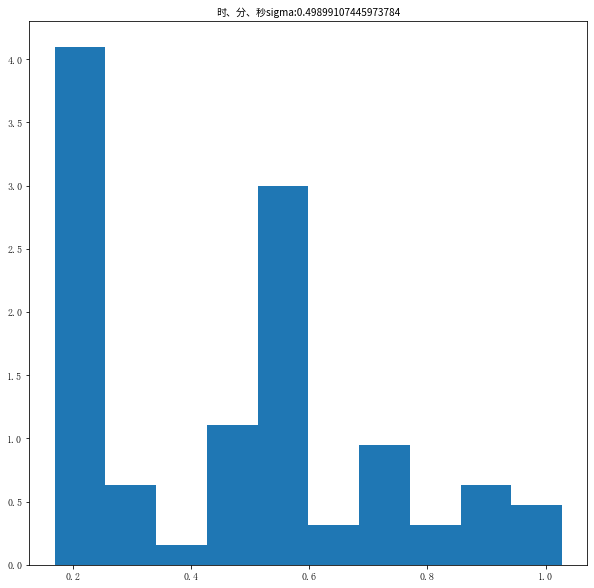

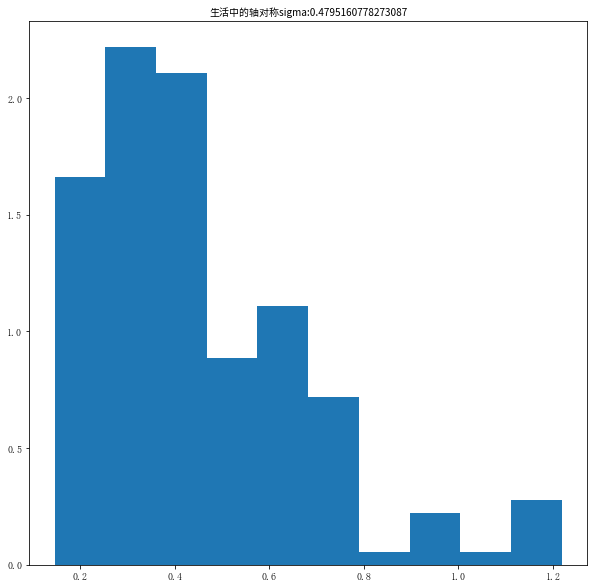

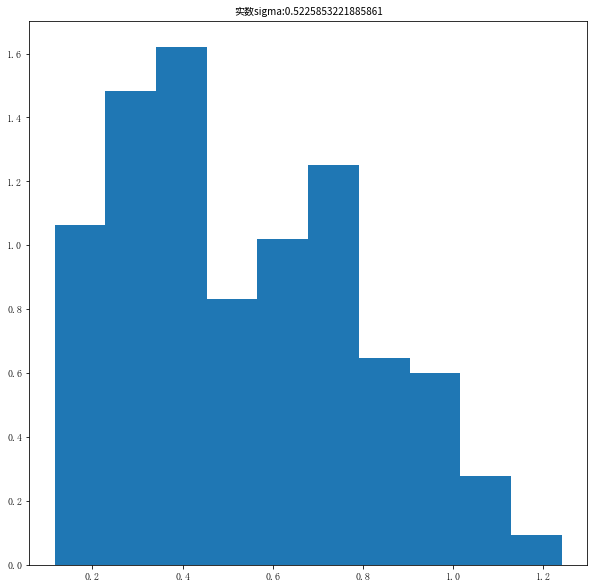

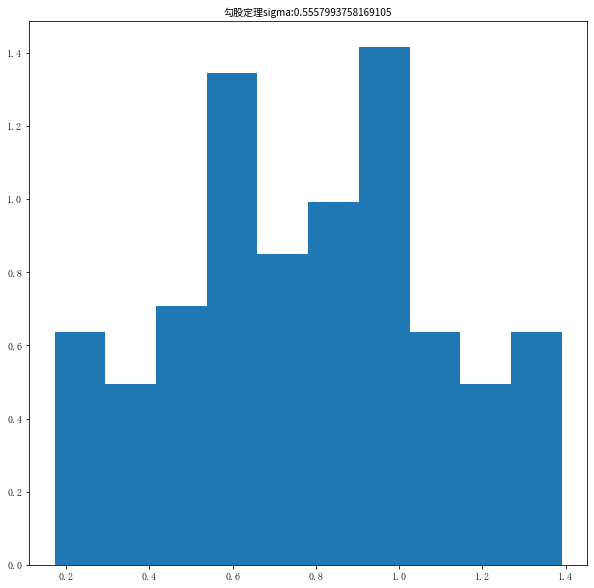

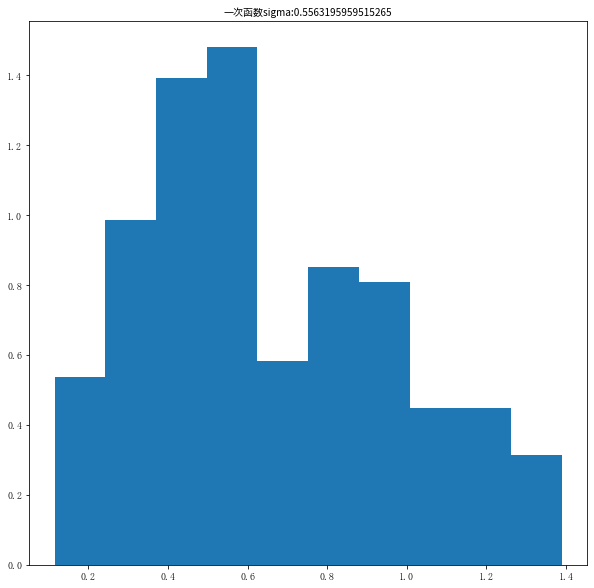

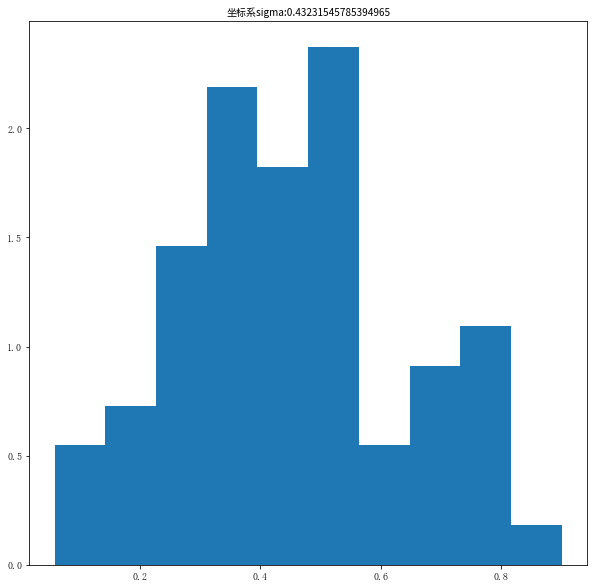

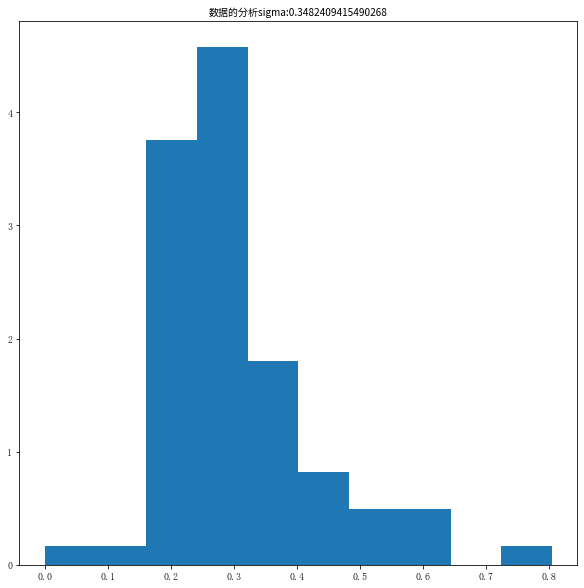

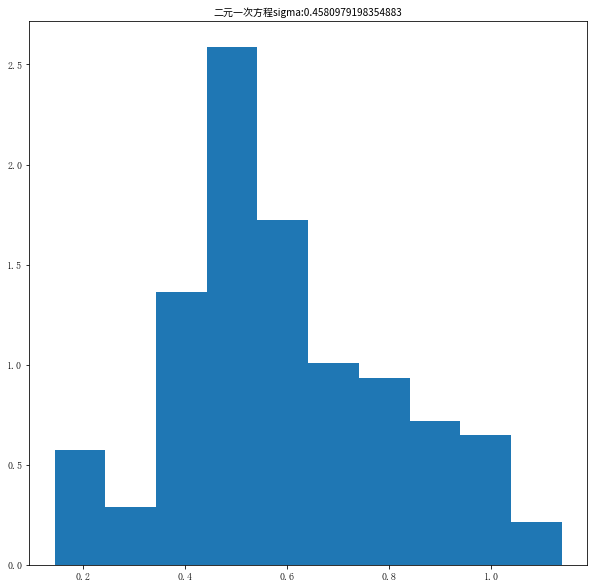

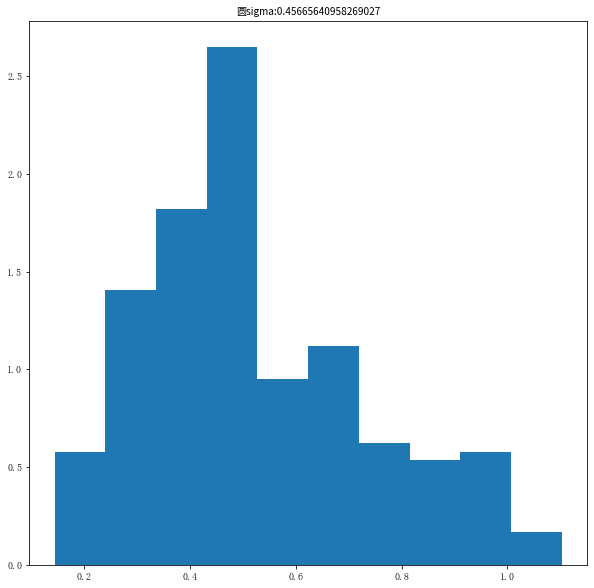

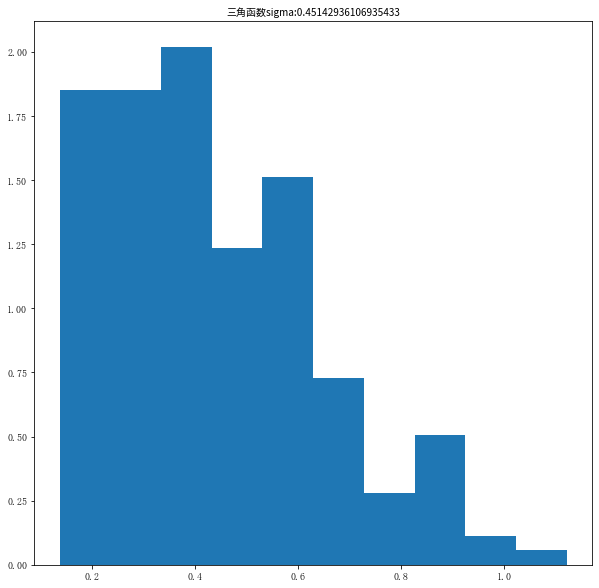

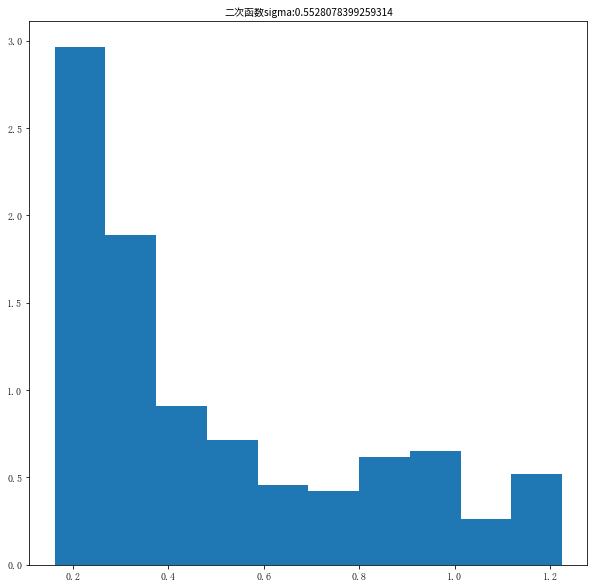

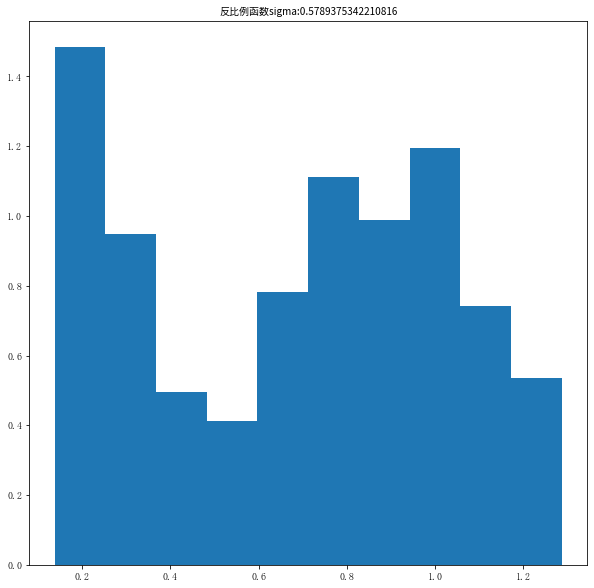

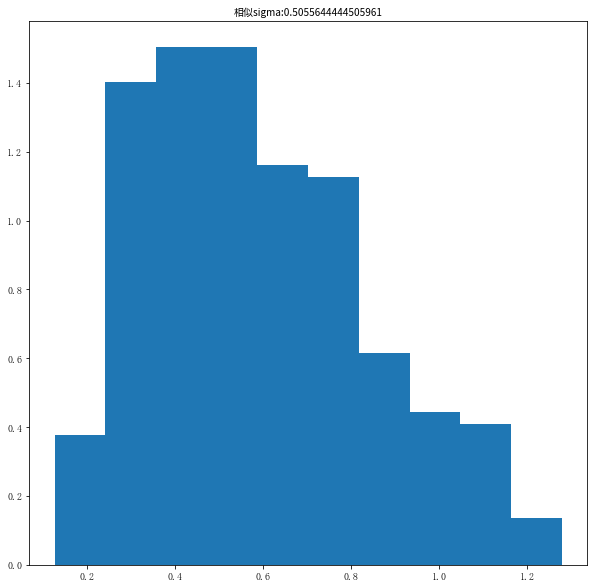

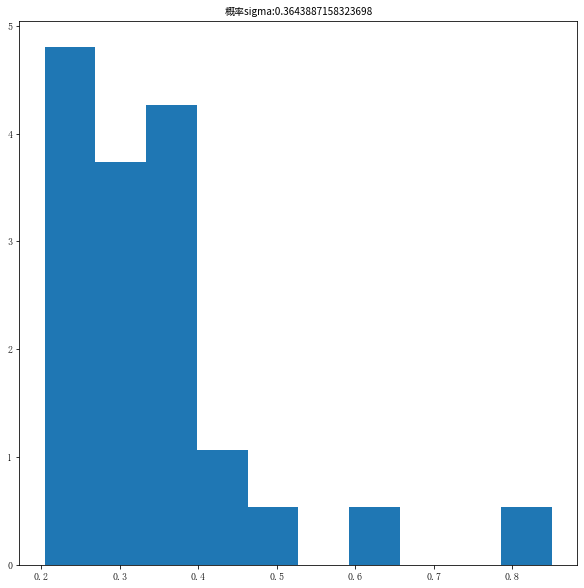

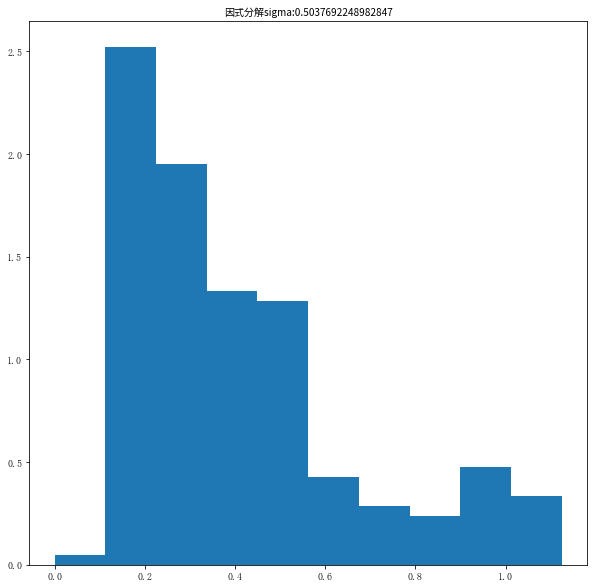

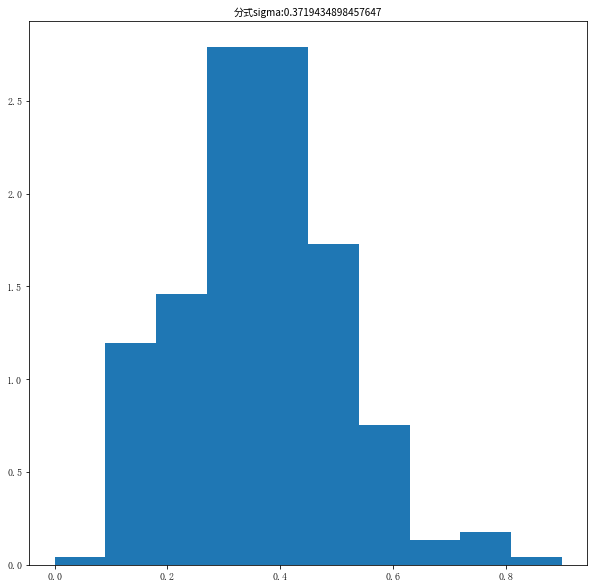

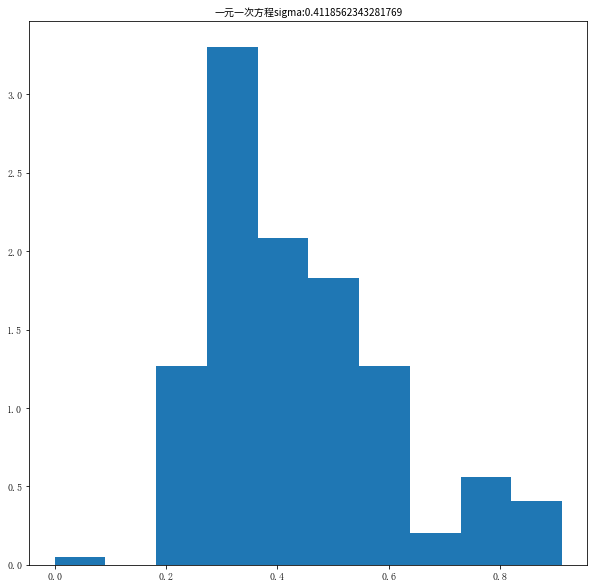

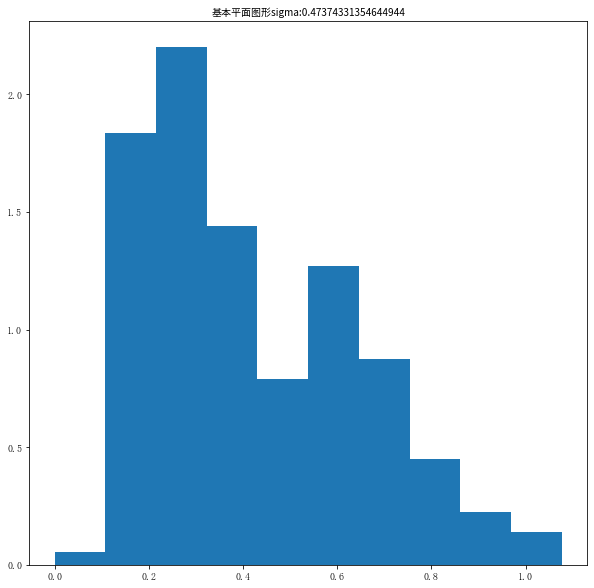

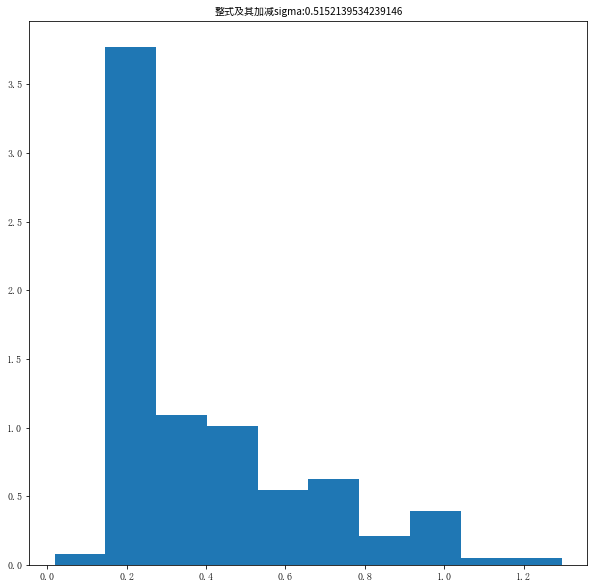

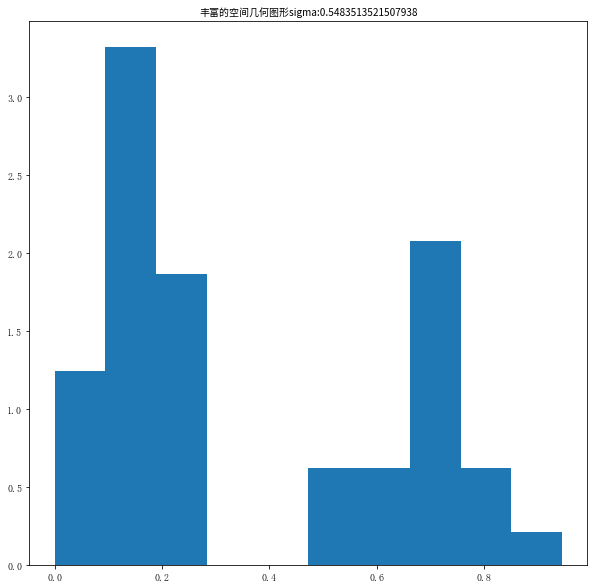

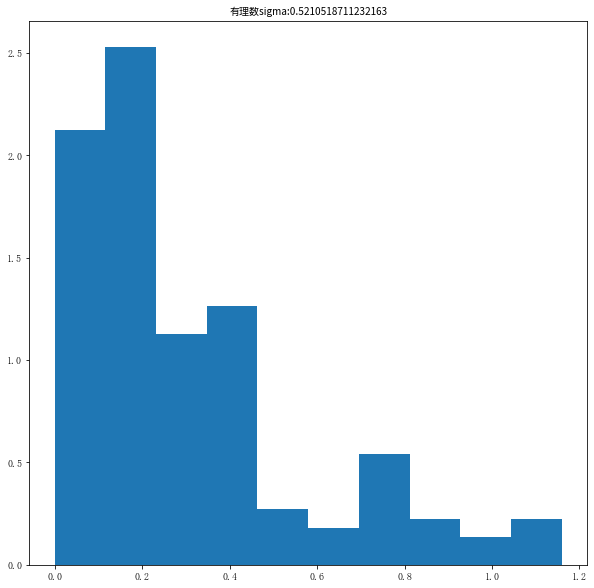

In [9]:
demo5(all_zhuanti)

In [5]:
selected_zhuanti=chuzhong_zhuanti
feature=[]
for zhuanti in selected_zhuanti:
    _,Q=getQuestionInZhuanTi(zhuanti)
    u,sigma,v1,v2=analysis(Q)
    feature.append(v1)

M,nodeAdj=featureExtract1(feature)


nodeA=list(range(len(feature)))
labels=[getZhuanTiNameById(x) for x in selected_zhuanti]

assert len(labels)==len(feature)
print('邻接情况',nodeAdj.shape)
print('M.shape',M.shape)

邻接情况 (20, 19)
M.shape (20, 20)


### 方法1，产生太多孤立的点

In [ ]:
edges_A=methodA_getEdge(nodeA,topK(M,2),nodeAdj,topK=2)
print('methodA:边的数量',len(edges_A))
_=createImage(nodeA,edges_A,labels)

In [ ]:
nodeA,nodeA_to=np.nonzero(M>0.995)
edges_B=set([(nodeA[i],nodeA_to[i]) for i in range(len(nodeA))])
print('methodB:边的数量',len(edges_B))
_=createImage(nodeA,edges_B,labels)

In [ ]:
M+1

### 方法2，产生边太多

In [ ]:
edges_B=methodB_getEdge(M,t=0.992)
print('methodB:边的数量',len(edges_B))
_=createImage(nodeA,edges_B,labels)

### 方法3=方法1+方法2（thresold）

In [ ]:
edges_C=methodC_getEdge(nodeA,nodeB,M,t=0.992)
print('methodC:边的数量',len(edges_C))
_=createImage(nodeA,edges_C,labels)

### 方法4=match topK

In [ ]:
K=3
edges_D=methodD_match(nodeA,nodeAdj,K)
print('methodD:边的数量',len(edges_D))
_=createImage(nodeA,edges_D,labels)

### 方法5=match topK+thresold

In [ ]:
K=3
edges_E=methodE_match(nodeA,nodeAdj,K,M,t=0.95)
print('methodE:边的数量',len(edges_E))
_=createImage(nodeA,edges_E,labels)

### 专题下知识点分析

In [ ]:
#id=二次函数
selected_zsdIds=getZsdIdByZhuantiId('2a2539bc03e811eb9aaebd621c7eea23')
feature=[]
for zsd in selected_zsdIds:
    _,Q=getQuestionInZsd(zsd)
    u,sigma,v1,v2=analysis(Q)
#     feature.append(v1)
    feature.append(np.hstack((u,v1)))
nodeA=list(range(len(feature)))
# M,nodeAdj=featureExtract1(feature)
M,nodeAdj=featureExtract2(feature)
labels=[getNodeNameById(x) for x in selected_zsdIds]

assert len(labels)==len(feature)
print('邻接情况',nodeAdj.shape)
print('M.shape',M.shape)
print('nodeB.shape',nodeB.shape)

K=3
edges_E=methodE_match(nodeA,nodeAdj,K,1-M,t=0.3)
print('methodD:边的数量',len(edges_E))
_=createImage(nodeA,edges_E,labels)